In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import math
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/spotify_songs-2.csv'
df2 = pd.read_csv(url)

In [3]:
#url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/Emotion_Labels.csv'
#df3 = pd.read_csv(url)

In [4]:
#df4 = pd.merge(df2,df3,on='track_id')
#df4 = df2.drop(['Unnamed: 19'], axis=1)
df4=df2

In [5]:
df4 = df4.dropna()
df4.shape

(1099, 19)

In [6]:
df4['playlist_id'].value_counts()

4hKPJNFIhdAg4pAksn78FJ    11
3ykXidKLz1eYPvuGoFlD1e    11
5jROYSZSL7cO0jGAqkPx7C    10
4NlAd9NpIa92IjErMyAriM    10
1qXg9ck25tBRxeXsj8mbDG    10
                          ..
6Ylmweq4pT7j3ScIv5uq1c     1
37i9dQZF1DWZjqjZMudx9T     1
3a9y4eeCJRmG9p4YKfqYIx     1
37i9dQZF1DX1OIMC8iDi74     1
1YgWQAs1s77NzieIH4ARKn     1
Name: playlist_id, Length: 359, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df11 = df2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cols = ['language', 'playlist_genre']
#df11[cols] = df11[cols].apply(LabelEncoder().fit_transform)

df12 = df2.set_index('track_name')

In [8]:
testdf = df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]
testdf1 =  df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C'])]
testdf2 = df4[df4['playlist_id'].isin(['3ykXidKLz1eYPvuGoFlD1e'])]
testdf3 = df4[df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ'])]

In [9]:
testdf1_1 = testdf1.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf2_1 = testdf2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf3_1 = testdf3.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)

In [10]:
df5 = df4[~df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df5 = df4.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
df5['emotion'] = df5['emotion'].astype(int)

In [13]:
df5.head(2)

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,language,emotion
0,41,rock,0.682,0.401,2,-10.068,1,0.0236,0.2790,0.01170,0.0887,0.566,97.091,tl,6
1,28,rock,0.303,0.880,9,-4.739,1,0.0442,0.0117,0.00994,0.3470,0.404,135.225,en,1


In [14]:
cols = ['language', 'playlist_genre']
df5[cols] = df5[cols].apply(LabelEncoder().fit_transform)

In [15]:
df11 = df5

In [16]:
df11['track_name'] = df4['track_name']
df5 = df5.drop(['track_name'], axis=1)

In [17]:
df12 = df11.set_index('track_name')

In [18]:
testdf1_1[cols] = testdf1_1[cols].apply(LabelEncoder().fit_transform)
testdf2_1[cols] = testdf2_1[cols].apply(LabelEncoder().fit_transform)
testdf3_1[cols] = testdf3_1[cols].apply(LabelEncoder().fit_transform)

In [19]:
X, y = df5.iloc[:, :-1], df5.iloc[:, -1]
X.shape

(1099, 14)

In [20]:
#strategy = {1:200, 2:120, 3:150, 4:100, 5:150,6:120, 7:70, 8:45 ,9:45 ,10:40}
#oversample = SMOTE(sampling_strategy=strategy)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
#counter = Counter(y)
#for k,v in counter.items():
#	per = v / len(y) * 100
#	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

In [21]:
#df6 = pd.DataFrame(X)
#df6['emotion'] = y
#df7 = df6.sample(frac=1)
#df5 = df5.dropna()

In [22]:
df5.shape
scaler = MinMaxScaler()

In [23]:
df5['emotion'].value_counts()

1     393
6     137
3     108
5     103
7      91
2      91
4      67
8      39
10     38
9      32
Name: emotion, dtype: int64

In [24]:
train_data_001 = df5.iloc[:1024,6:14]
train_data_01 = pd.DataFrame(scaler.fit_transform(train_data_001))
train_data_length = len(train_data_01)
train_data_01.shape

(1024, 8)

In [25]:
testdf1_2 = testdf1_1.iloc[:1024,6:14]
testdf2_2 = testdf2_1.iloc[:1024,6:14]
testdf3_2 = testdf3_1.iloc[:1024,6:14]
df13 = df12.iloc[:1024,6:14]

In [26]:
train_data = torch.tensor(train_data_01.values.astype(np.float32))

In [27]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [28]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [29]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [30]:
discriminator = Discriminator()

In [31]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [32]:
lr = 0.001
num_epochs = 500
loss_function = nn.BCELoss()

In [33]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [34]:
# list for final generated samples
final_generated_samples=[]
final_generated_samples_list=[]
losses_g =[]
losses_d = []
labels = []
pred = []
true = []

In [35]:
#len(labels[0])

In [36]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.rand((batch_size, 8))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()


        # Data for training the generator
        latent_space_samples = torch.rand((batch_size, 8))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        losses_g.append(loss_generator)
        losses_d.append(loss_discriminator)

        labels.append(all_samples_labels)
        pred.append(output_discriminator)
        true.append(all_samples)

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            final_generated_samples.append(generated_samples[0])
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            

Epoch: 0 Loss D.: 0.40764665603637695
Epoch: 0 Loss G.: 1.3937236070632935
Epoch: 10 Loss D.: 0.3848850131034851
Epoch: 10 Loss G.: 2.348381757736206
Epoch: 20 Loss D.: 0.3290456533432007
Epoch: 20 Loss G.: 1.572862982749939
Epoch: 30 Loss D.: 0.6616410613059998
Epoch: 30 Loss G.: 1.4197337627410889
Epoch: 40 Loss D.: 1.2251527309417725
Epoch: 40 Loss G.: 1.1555100679397583
Epoch: 50 Loss D.: 0.4220186173915863
Epoch: 50 Loss G.: 1.1456894874572754
Epoch: 60 Loss D.: 0.6328568458557129
Epoch: 60 Loss G.: 1.1087840795516968
Epoch: 70 Loss D.: 0.6385144591331482
Epoch: 70 Loss G.: 0.9048008918762207
Epoch: 80 Loss D.: 0.6249069571495056
Epoch: 80 Loss G.: 1.1310447454452515
Epoch: 90 Loss D.: 0.2208137810230255
Epoch: 90 Loss G.: 2.317936897277832
Epoch: 100 Loss D.: 0.5060639977455139
Epoch: 100 Loss G.: 1.010591983795166
Epoch: 110 Loss D.: 0.40791696310043335
Epoch: 110 Loss G.: 1.1798326969146729
Epoch: 120 Loss D.: 0.34977057576179504
Epoch: 120 Loss G.: 1.5096830129623413
Epoch: 13

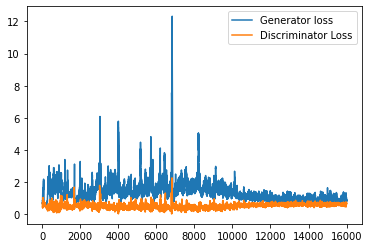

In [37]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.show()

In [38]:
# make a dataframe for sample list
for i in final_generated_samples:
  a = i.detach().numpy()
  final_generated_samples_list.append(a)
final_generated_samples_df = pd.DataFrame(final_generated_samples_list)

In [39]:
latent_space_samples[:10]

tensor([[0.7841, 0.1358, 0.9633, 0.4412, 0.6561, 0.5800, 0.8084, 0.8575],
        [0.9705, 0.0198, 0.3080, 0.0963, 0.6423, 0.0908, 0.7915, 0.9325],
        [0.3287, 0.3533, 0.8023, 0.3267, 0.9234, 0.7581, 0.5548, 0.7091],
        [0.7369, 0.4139, 0.7216, 0.2589, 0.9660, 0.1423, 0.9181, 0.7655],
        [0.3662, 0.8227, 0.4395, 0.5819, 0.5777, 0.2210, 0.9061, 0.4788],
        [0.0188, 0.1022, 0.3470, 0.2582, 0.7621, 0.7227, 0.3877, 0.8937],
        [0.2293, 0.7025, 0.8670, 0.4486, 0.7610, 0.8580, 0.4045, 0.3147],
        [0.4873, 0.9083, 0.3808, 0.9449, 0.0120, 0.9750, 0.6577, 0.9399],
        [0.6235, 0.3969, 0.6636, 0.9576, 0.2297, 0.6097, 0.1632, 0.1053],
        [0.8615, 0.9808, 0.5032, 0.9517, 0.7101, 0.2208, 0.1329, 0.8912]])

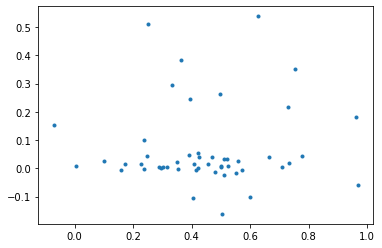

In [40]:
#plot of two variables from generated samples
plt.plot(final_generated_samples_df.iloc[:, 6], 
         final_generated_samples_df.iloc[:, 3], ".")

In [41]:
from scipy.spatial import distance

In [42]:
float_x = real_samples[0].double()

In [43]:
float_x = list(float_x.numpy())

In [44]:
# Cosine similarity
def square_rooted(x):
   return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)
  
print(cosine_similarity(final_generated_samples_df[0],float_x))

0.153


In [45]:
#Jaccard similarity
from math import*
  
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

In [47]:
df9 = pd.DataFrame(scaler.inverse_transform(final_generated_samples_df))
df10 = pd.DataFrame(scaler.inverse_transform(train_data_01))

In [48]:
generated_vals2=[]
for i, j in df9.iterrows():
  generated_vals2.append(j.values)

generated_vals3 = generated_vals2[:10]

train_data_vals2=[]
for i, j in train_data_001.iterrows():
  train_data_vals2.append(j.values)


In [49]:
def cos_similarity(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cos.append(rec_score)
  rec_idx = df13.index[rec_index]
  cos_name.append(rec_idx)
  rec_len = len(recommended)
  results1.append(['index:',rec_idx,'; cos sim:',rec_score])

In [50]:
def euclid_similarity(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_euc.append(rec_score)
  rec_idx = df13.index[rec_index]
  euc_name.append(rec_idx)
  rec_len = len(recommended)
  results2.append(['index:',rec_idx,'; euclid sim:',rec_score])

In [51]:
dst = distance.euclidean(final_generated_samples_df.iloc[0,:].values,float_x)
print('Euclidean distance: %.3f' % dst)

Euclidean distance: 0.835


In [52]:
# pick recommendations with cosine similarity
results1 =[]
cos_name =[]
rec_cos = []
for i in generated_vals2:
  a = cos_similarity(i,train_data_vals2)

In [53]:
cols2 = ['language']
cos_rec =  df4[df4['track_name'].isin(cos_name)]
cos_rec2 = cos_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cos_rec2[cols2] = cos_rec2[cols2].apply(LabelEncoder().fit_transform)
cos_rec3 = cos_rec2.iloc[:1024,6:14]

In [54]:
cos_rec4=[]
for i, j in cos_rec3.iterrows():
  cos_rec4.append(j.values)

In [55]:
cos_rec3['track_name'] = df4['track_name']
cos_rec5 = cos_rec3.set_index('track_name')

In [56]:
rec_cose=[]
for i in rec_cos:
  rec_cose.append(i[0][0])

In [57]:
# pick recommendations with euclidean similarity
results2 =[]
euc_name =[]
rec_euc = []
for i in generated_vals2:
  a = euclid_similarity(i,train_data_vals2)

In [58]:
euc_rec =  df4[df4['track_name'].isin(euc_name)]
euc_rec2 = euc_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
euc_rec2[cols2] = euc_rec2[cols2].apply(LabelEncoder().fit_transform)
euc_rec3 = euc_rec2.iloc[:1024,6:14]

In [59]:
euc_rec4=[]
for i, j in euc_rec3.iterrows():
  euc_rec4.append(j.values)

In [60]:
euc_rec3['track_name'] = df4['track_name']
euc_rec5 = euc_rec3.set_index('track_name')

In [61]:
testdf1_3 = testdf1_2
testdf1_3['track_name'] = testdf1['track_name']
testdf1_3 = testdf1_3.set_index('track_name')

testdf2_3 = testdf2_2
testdf2_3['track_name'] = testdf2['track_name']
testdf2_3 = testdf2_3.set_index('track_name')

testdf3_3 = testdf3_2
testdf3_3['track_name'] = testdf3['track_name']
testdf3_3 = testdf3_3.set_index('track_name')

In [62]:
test_data1 = testdf1_3.values
test_data2 = testdf2_3.values
test_data3 = testdf3_3.values

In [63]:
def cos_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT1.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost1_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT1.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct1_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [64]:
#compare recomendations to test subjects
cost1_name = []
rec_cosT1 = []
for i in test_data1:
  a = cos_similarity_t1(i,cos_rec4)

len train data: 51 ; index: LUNA ; cos sim: [[0.9999841]]
len train data: 51 ; index: LUNA ; cos sim: [[0.9999654]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99995635]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99998848]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99995792]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99997355]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99996732]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99996002]]
len train data: 51 ; index: LUNA ; cos sim: [[0.9999583]]
len train data: 51 ; index: Sektion (feat. Branco & Gilli) ; cos sim: [[0.9999875]]


In [65]:
rec_coseT1=[]
for i in rec_cosT1:
  rec_coseT1.append(i[0][0])

In [66]:
euct1_name = []
rec_eucT1 = []
for i in test_data1:
  a = euclid_similarity_t1(i,euc_rec4)

len train data: 48 ; index: Flying On My Own - Dave AudÃ© Remix ; euclid sim: 2.5188077844218277
len train data: 48 ; index: Poker Face ; euclid sim: 1.846909318622843
len train data: 48 ; index: All Day All Night ; euclid sim: 2.1283099426775185
len train data: 48 ; index: Poker Face ; euclid sim: 1.464762722881052
len train data: 48 ; index: Estamos Arriba ; euclid sim: 2.3256516344940827
len train data: 48 ; index: Realtalk Infinity ; euclid sim: 2.1190979071293574
len train data: 48 ; index: Talk To Me - Frdy Remix ; euclid sim: 1.0739900217051643
len train data: 48 ; index: Dear Society ; euclid sim: 1.0158863374457814
len train data: 48 ; index: 22 ; euclid sim: 2.845257454941469
len train data: 48 ; index: My Body ; euclid sim: 1.9734539797050648


In [67]:
def cos_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT2.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost2_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT2.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct2_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [68]:
#compare recomendations to test subjects
cost2_name = []
rec_cosT2 = []
for i in test_data2:
  a = cos_similarity_t2(i,cos_rec4)

len train data: 51 ; index: LUNA ; cos sim: [[0.99997501]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99998153]]
len train data: 51 ; index: Sektion (feat. Branco & Gilli) ; cos sim: [[0.99994152]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99995498]]
len train data: 51 ; index: LUNA ; cos sim: [[0.9999686]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99999511]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99995157]]
len train data: 51 ; index: LUNA ; cos sim: [[0.9999855]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99995111]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99994777]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99998871]]


In [69]:
rec_coseT2=[]
for i in rec_cosT2:
  rec_coseT2.append(i[0][0])

In [70]:
euct2_name = []
rec_eucT2 = []
for i in test_data2:
  a = euclid_similarity_t2(i,euc_rec4)

len train data: 48 ; index: My Body ; euclid sim: 2.107941742099151
len train data: 48 ; index: Eye of the Tiger ; euclid sim: 1.9181598914737557
len train data: 48 ; index: Buss Down (feat. ZieZie) ; euclid sim: 3.3738673655328286
len train data: 48 ; index: Realtalk Infinity ; euclid sim: 0.8836118091089579
len train data: 48 ; index: Lose Your Soul ; euclid sim: 1.515460817766319
len train data: 48 ; index: My Body ; euclid sim: 1.9969429857910401
len train data: 48 ; index: Realtalk Infinity ; euclid sim: 0.7562831810902557
len train data: 48 ; index: Poker Face ; euclid sim: 1.990170648464195
len train data: 48 ; index: Fronteamos Porque Podemos (feat. Daddy Yankee, Yandel & Nengo Flow) ; euclid sim: 2.7235468161939136
len train data: 48 ; index: My Body ; euclid sim: 1.1709931895617507
len train data: 48 ; index: I Wanna Sex You Up ; euclid sim: 2.1748031013461495


In [72]:
def cos_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT3.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost3_name.append(rec_idx) 
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT3.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct3_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [73]:
#compare recomendations to test subjects
cost3_name = []
rec_cosT3 = []
for i in test_data3:
  a = cos_similarity_t3(i,cos_rec4)

len train data: 51 ; index: LUNA ; cos sim: [[0.99995703]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99997699]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99999009]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99998899]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99998379]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99998042]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99998487]]
len train data: 51 ; index: Sektion (feat. Branco & Gilli) ; cos sim: [[0.99991462]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99998999]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99998022]]
len train data: 51 ; index: LUNA ; cos sim: [[0.99994613]]


In [74]:
rec_coseT3=[]
for i in rec_cosT3:
  rec_coseT3.append(i[0][0])

In [75]:
euct3_name = []
rec_eucT3 = []
for i in test_data3:
  a = euclid_similarity_t3(i,euc_rec4)

len train data: 48 ; index: Buss Down (feat. ZieZie) ; euclid sim: 1.4798217064044437
len train data: 48 ; index: Estamos Arriba ; euclid sim: 2.18235609491783
len train data: 48 ; index: Sunburn ; euclid sim: 1.6999899742057265
len train data: 48 ; index: More ; euclid sim: 2.4006066672874584
len train data: 48 ; index: Sunburn ; euclid sim: 1.743066287207689
len train data: 48 ; index: 22 ; euclid sim: 4.673617746981446
len train data: 48 ; index: Quiero Repetir ; euclid sim: 3.320896070340039
len train data: 48 ; index: Eye of the Tiger ; euclid sim: 1.7344050827981392
len train data: 48 ; index: Poker Face ; euclid sim: 1.0314997683576725
len train data: 48 ; index: Fronteamos Porque Podemos (feat. Daddy Yankee, Yandel & Nengo Flow) ; euclid sim: 2.8407341516247775
len train data: 48 ; index: Eye of the Tiger ; euclid sim: 1.1800948709675838


In [76]:
rec_coseT1.extend(rec_coseT2)

In [77]:
rec_coseT1.extend(rec_coseT3)

In [78]:
print(rec_coseT1)

[0.9999841037516034, 0.9999653991692578, 0.9999563450304619, 0.9999884803618749, 0.9999579153987349, 0.9999735526601331, 0.9999673159463939, 0.9999600243770032, 0.9999582986721756, 0.9999874965831516, 0.9999750121659532, 0.9999815343658153, 0.9999415231125649, 0.999954984247071, 0.9999685976066536, 0.99999510692748, 0.999951574931363, 0.9999854969054314, 0.9999511114433148, 0.9999477736418845, 0.9999887142489676, 0.9999570315875328, 0.9999769918050142, 0.9999900877877266, 0.9999889904713053, 0.9999837929241631, 0.9999804223994133, 0.9999848743965635, 0.9999146218418645, 0.9999899927658477, 0.9999802222720939, 0.9999461277450048]


In [79]:
rec_eucT1.extend(rec_eucT2)
rec_eucT1.extend(rec_eucT3)

In [80]:
print(rec_eucT1)

[2.5188077844218277, 1.846909318622843, 2.1283099426775185, 1.464762722881052, 2.3256516344940827, 2.1190979071293574, 1.0739900217051643, 1.0158863374457814, 2.845257454941469, 1.9734539797050648, 2.107941742099151, 1.9181598914737557, 3.3738673655328286, 0.8836118091089579, 1.515460817766319, 1.9969429857910401, 0.7562831810902557, 1.990170648464195, 2.7235468161939136, 1.1709931895617507, 2.1748031013461495, 1.4798217064044437, 2.18235609491783, 1.6999899742057265, 2.4006066672874584, 1.743066287207689, 4.673617746981446, 3.320896070340039, 1.7344050827981392, 1.0314997683576725, 2.8407341516247775, 1.1800948709675838]


In [81]:
EMrec_eucT1 = [3.1794949929867675, 2.2247396566789623, 2.3834931344772268, 
               1.7795386312187729, 4.131295387483819, 1.782733242349986, 2.2968121037646902, 
               5.667416601998549, 5.338334433645116, 0.6905423013886464, 2.244228256680679, 
               1.3170121934449535, 2.7746301663465065, 1.5439326037093688, 2.0031029244857925, 
               2.0484200979105913, 1.1461071213459935, 1.1926341643682326, 3.4386030375720917, 
               1.6234789433756147, 9.200148453280523, 1.6392889935768629, 4.202008981427813, 
               1.6396474511260046, 3.10060616783637, 1.6719271526427204, 6.492919261780452, 
               1.1699436832052363, 2.831385897118225, 1.0, 2.67127813089678, 5.366725732697733]

In [120]:
# leven test for equal variance p-value lower than 0.01 means not equal
from scipy.stats import levene
stat, p = levene(rec_eucT1, EMrec_eucT1)
print('pvalue < 0.05 means not equal variance, pvalue:' ,p)

pvalue < 0.05 means not equal variance, pvalue: 0.01862993413234162


In [121]:
from scipy import stats
stats.ttest_ind(rec_eucT1, EMrec_eucT1,equal_var = False)

Ttest_indResult(statistic=-2.2022351381524796, pvalue=0.033105726719449634)

In [ ]:
# leven test for equal variance p-value lower than 0.01 means not equal
from scipy.stats import levene
stat, p = levene(rec_coseT1, NMrec_coseT1)
print('pvalue > 0.01 means equal variance, pvalue:' ,p)

In [ ]:
import scipy.stats as stats
stats.ttest_ind(rec_coseT1, b=NMrec_coseT1, equal_var=False)

In [84]:
print(len(rec_eucT1))
print(len(EMrec_eucT1))

32
32


The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.0331) is less than alpha = 0.05, we reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.

In [85]:
testing34 = testdf1.iloc[:,[0,16]]
testing34

,track_name,track_artist
136,I Dare You,The xx
186,Howling,RY X
286,Lower,TENDER
393,Prettiest Virgin (Radio Edit),Agar Agar
429,Love Is a Bitch,Two Feet
451,Song For You,Rhye
473,Afternoon,TENDER
559,Jungle,Tash Sultana
1012,Tainted,TENDER
1089,Un autre que moi,Fishbach


In [86]:
testing35 = testdf2.iloc[:,[0,16]]
testing35

,track_name,track_artist
7,Tender Lover,Babyface
162,I'm Dreamin',Christopher Williams
194,I Adore Mi Amor,Color Me Badd
207,Miss You Much,Janet Jackson
410,When Can I See You,Babyface
449,Rump Shaker,Wreckx-N-Effect
563,Lyte as a Rock,MC Lyte
973,Just Got Paid,Johnny Kemp
1120,End Of The Road,Boyz II Men
1212,Nasty,Janet Jackson


In [87]:
testing36 = testdf3.iloc[:,[0,16]]
testing36

,track_name,track_artist
85,On Fire,Carmada
211,Hall & Oates,Satchmode
309,Sway - Chainsmokers Remix,Anna of the North
463,Feel It All Around,Washed Out
474,Ghost - Lost Kings Remix,Halsey
500,Cool Blue,The Japanese House
538,Anywhere We Go,Kaptan
923,Indecision,Shura
929,Loudspeaker,MUNA
1279,Classic (feat. POWERS) - POWERS Sunset Version,The Knocks


In [88]:
df1_rec =  df4[df4['track_name'].isin(euct1_name)]
df2_rec =  df4[df4['track_name'].isin(euct2_name)]
df3_rec =  df4[df4['track_name'].isin(euct3_name)]
dfc1_rec =  df4[df4['track_name'].isin(cost1_name)]
dfc2_rec =  df4[df4['track_name'].isin(cost2_name)]
dfc3_rec =  df4[df4['track_name'].isin(cost3_name)]

In [89]:
testing37 = df1_rec.iloc[:,[0,16]]
testing37

,track_name,track_artist
269,22,TINI
298,All Day All Night,Bobby Brown
444,Estamos Arriba,Bad Bunny
533,Flying On My Own - Dave AudÃ© Remix,CÃ©line Dion
545,My Body,Hot Shade
1155,Talk To Me - Frdy Remix,Topic
1210,Dear Society,Madison Beer
1230,Poker Face,Lady Gaga
1244,Realtalk Infinity,Jigzaw


In [90]:
testing38 = df2_rec.iloc[:,[0,16]]
testing38

,track_name,track_artist
220,Lose Your Soul,Jelly Roll
257,I Wanna Sex You Up,Color Me Badd
545,My Body,Hot Shade
561,Eye of the Tiger,Survivor
1093,Eye of the Tiger,Survivor
1143,Buss Down (feat. ZieZie),Aitch
1230,Poker Face,Lady Gaga
1244,Realtalk Infinity,Jigzaw
1259,"Fronteamos Porque Podemos (feat. Daddy Yankee,...",De La Ghetto


In [91]:
testing39 = df3_rec.iloc[:,[0,16]]
testing39

,track_name,track_artist
269,22,TINI
366,More,Zion
444,Estamos Arriba,Bad Bunny
561,Eye of the Tiger,Survivor
1064,Sunburn,DROELOE
1093,Eye of the Tiger,Survivor
1143,Buss Down (feat. ZieZie),Aitch
1230,Poker Face,Lady Gaga
1259,"Fronteamos Porque Podemos (feat. Daddy Yankee,...",De La Ghetto
1307,Quiero Repetir,Ozuna


In [92]:
testing40 = dfc1_rec.iloc[:,[0,16]]
testing40

,track_name,track_artist
229,Sektion (feat. Branco & Gilli),Benny Jamz
467,LUNA,Sick Individuals


In [93]:
testing41 = dfc2_rec.iloc[:,[0,16]]
testing41

,track_name,track_artist
229,Sektion (feat. Branco & Gilli),Benny Jamz
467,LUNA,Sick Individuals


In [94]:
testing42 = dfc2_rec.iloc[:,[0,16]]
testing42

,track_name,track_artist
229,Sektion (feat. Branco & Gilli),Benny Jamz
467,LUNA,Sick Individuals


In [123]:
def oneslistmaker(n):
    listofones = [1] * n
    return listofones

In [134]:
#classification report with emotion model cosine distance
from sklearn.metrics import accuracy_score
conf_matrix1 = confusion_matrix(y_true=y_test, y_pred=y_pred)
y_true = oneslistmaker(32)
y_pred = [0,0,1,0,0,0,1,0	,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1]

print('Cosine similarrity model accuracy with emotion:',accuracy_score(y_true, y_pred))

Cosine similarrity model accuracy: 0.25


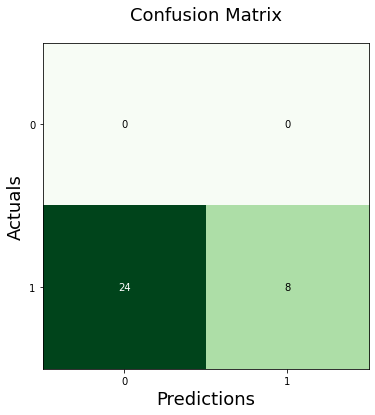

In [131]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [135]:
#classification report with emotion model euclidean distance
conf_matrix2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
target_names = oneslistmaker(32)
y_true = oneslistmaker(32)
y_pred = [1,0,1,1,1,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1]
print('Euclidean distance model accuracy with emotion:',accuracy_score(y_true, y_pred))

Euclidean distance model accuracy with emotion: 0.65625


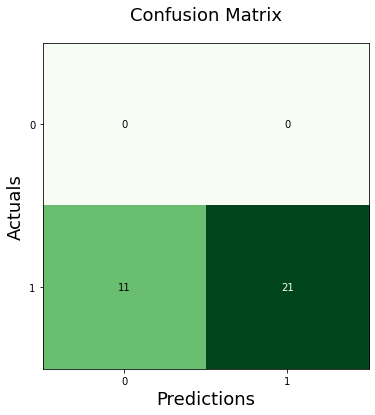

In [118]:
#confusion matrix with emotion model for the euclidean distance
fig, ax = plot_confusion_matrix2(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [144]:
#classification report with no emotion model cosine similarity
from sklearn.metrics import accuracy_score
y_true = oneslistmaker(32)
y_pred = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0]
print('Cosine distance model accuracy with emotion:',accuracy_score(y_true, y_pred))

Cosine distance model accuracy with emotion: 0.1875


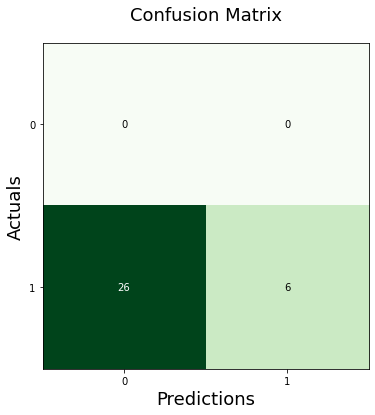

In [145]:
#confusion matrix with no emotion model for the cosine similarity
conf_matrix1 = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [147]:
#classification report with no emotion model euclidean distance
#conf_matrix2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
target_names = oneslistmaker(32)
y_true = oneslistmaker(32)
y_pred = [1,0,1,1,1,0,0,1,0,1,1,1,0,0,0,1,1,1,0,1,1,1,1,	1,0,1,0,1,1,1,0,0]
print('Euclidean distance model accuracy with emotion:',accuracy_score(y_true, y_pred))

Euclidean distance model accuracy with emotion: 0.625


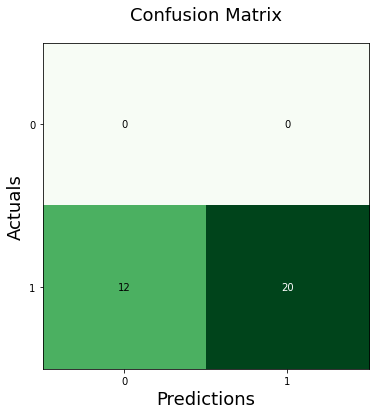

In [148]:
#confusion matrix with no emotion model for the cosine similarity
conf_matrix2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix2, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()